**Project Title: Credit Card Fraud Detection**

**Problem Statement:**


With the increasing prevalence of online transactions, ensuring the security of credit card
transactions is very important. The objective of this project is to develop a robust machine
learning model capable of accurately detecting fraudulent credit card transactions in real-time.
Utilizing a dataset containing transaction details such as transaction amount, merchant
category, cardholder information, transaction location, the aim is to build a predictive model
that can effectively differentiate between legitimate and fraudulent transactions. By employing
advanced machine learning algorithms and feature engineering techniques, the goal is to create
a system that enhances fraud detection capabilities, thereby minimizing financial losses for both
cardholders and financial institutions while maintaining a low false positive rate. Ultimately, this
project seeks to contribute to the development of proactive measures for securing credit card
transactions and safeguarding the financial interests of stakeholders in the digital economy.

**Dataset Overview:**

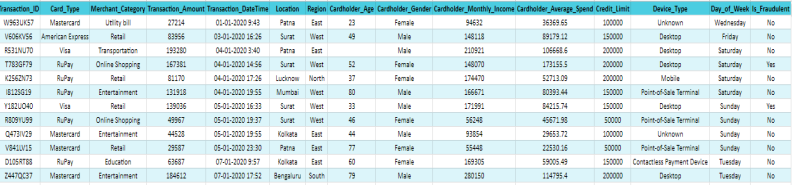

**Data Atributes:**

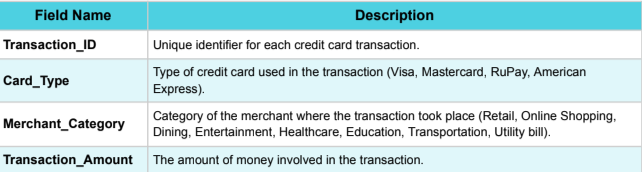

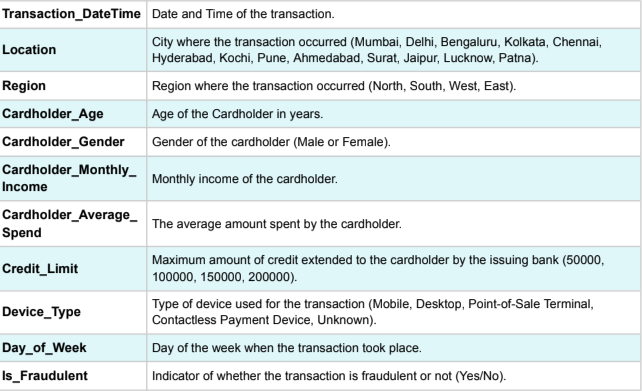

In [1]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset

df=pd.read_csv('credit_card_transactions.csv')
df

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [4]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


**Project Steps and Objectives:**

**1) Exploratory Data Analysis (EDA):**

**a) Analyze the distribution of categorical features such as Card_Type, Merchant_Category,Location, etc.**

In [5]:
#take some categorical columns to find the distribution

categorical_cols=['Card_Type','Merchant_Category','Location','Region','Device_Type','Is_Fraudulent']
categorical_cols

['Card_Type',
 'Merchant_Category',
 'Location',
 'Region',
 'Device_Type',
 'Is_Fraudulent']

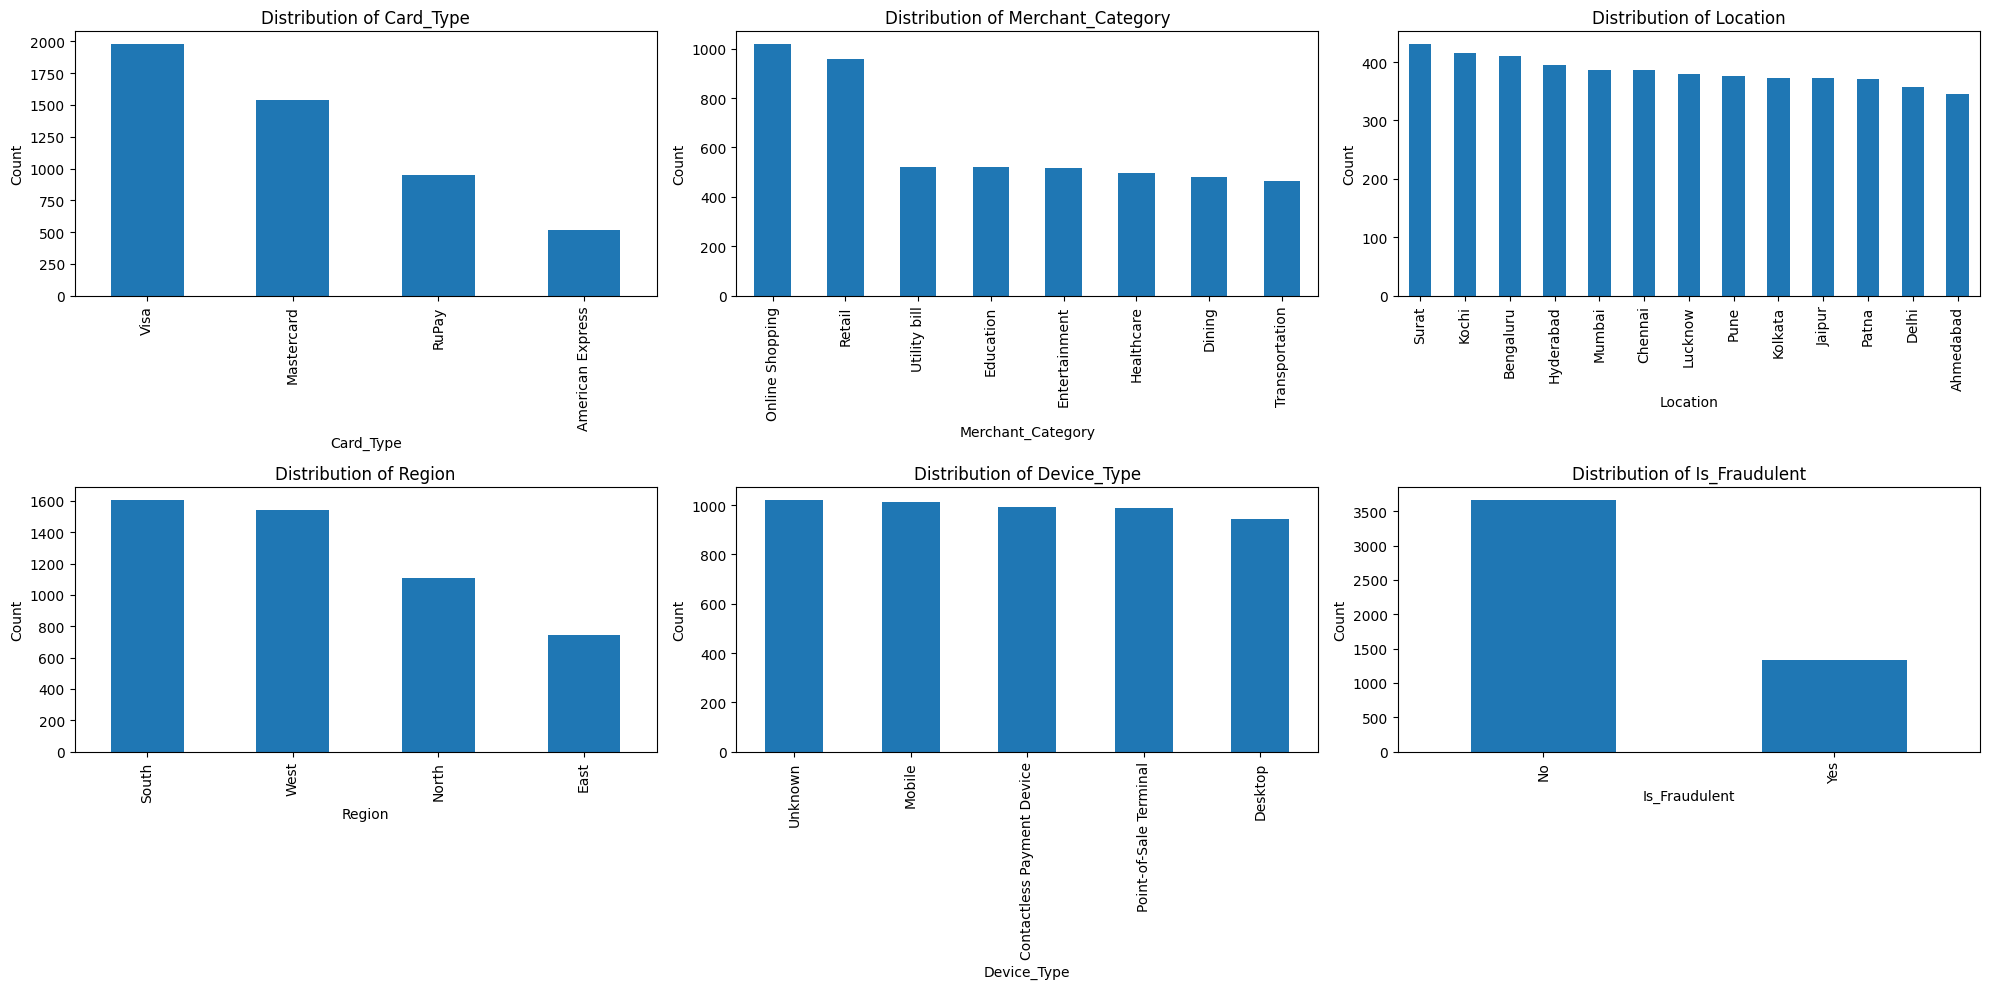

In [6]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
for col,axis in zip(categorical_cols,axes.flatten()):
  df[col].value_counts().plot(kind='bar',ax=axis)
  axis.set_title(f'Distribution of {col}')
  axis.set_xlabel(col)
  axis.set_ylabel('Count')
plt.tight_layout()
plt.show()

The above subplots shows the distribution of some categorical features of the dataset.

**b)Explore numerical features like Transaction_Amount, Cardholder_Age,**
**Cardholder_Monthly_Income, and Cardholder_Average_Spend.Use descriptive** **statistics to understand their central tendency and spread.**

In [7]:
#find discriptive statistics for all the numerical columns of the dataset
df.describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,49.106680,137353.817542,63058.343566,124654.377880
std,43089.045623,18.398524,69471.623020,40056.989704,55668.246494
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,80.000000,299907.000000,199898.290000,200000.000000


**c) Conduct bivariate and multivariate analysis to identify potential relationships between the features as well as with the target variable (Is_Fraudulent).**

In [8]:
#take some columns for features find bivaariate analysis

features=['Transaction_Amount','Location','Card_Type','Cardholder_Monthly_Income']
features

['Transaction_Amount', 'Location', 'Card_Type', 'Cardholder_Monthly_Income']

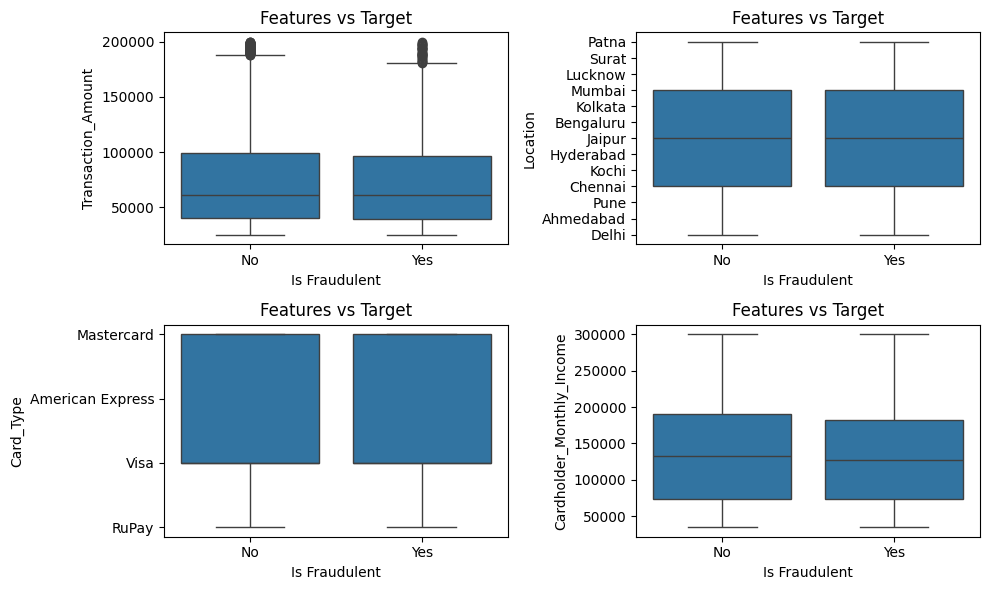

In [9]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,6))
for col,axis in zip(features,axes.flatten()):
  sns.boxplot(x='Is_Fraudulent',y=col,data=df,ax=axis)
  axis.set_title(f'Features vs Target')
  axis.set_xlabel('Is Fraudulent')
  axis.set_ylabel(col)
plt.tight_layout()
plt.show()

In [10]:
#multivariate analysis
#find correlationship for numerical columns
numerical_cols=df.select_dtypes(include=np.number).columns
correleation_matrix=df[numerical_cols].corr()
correleation_matrix

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
Transaction_Amount,1.000000,-0.018885,0.567976,0.835735,0.639278
Cardholder_Age,-0.018885,1.000000,-0.022468,-0.001833,-0.011339
Cardholder_Monthly_Income,0.567976,-0.022468,1.000000,0.525069,0.888672
Cardholder_Average_Spend,0.835735,-0.001833,0.525069,1.000000,0.590412
Credit_Limit,0.639278,-0.011339,0.888672,0.590412,1.000000


<Figure size 600x600 with 0 Axes>

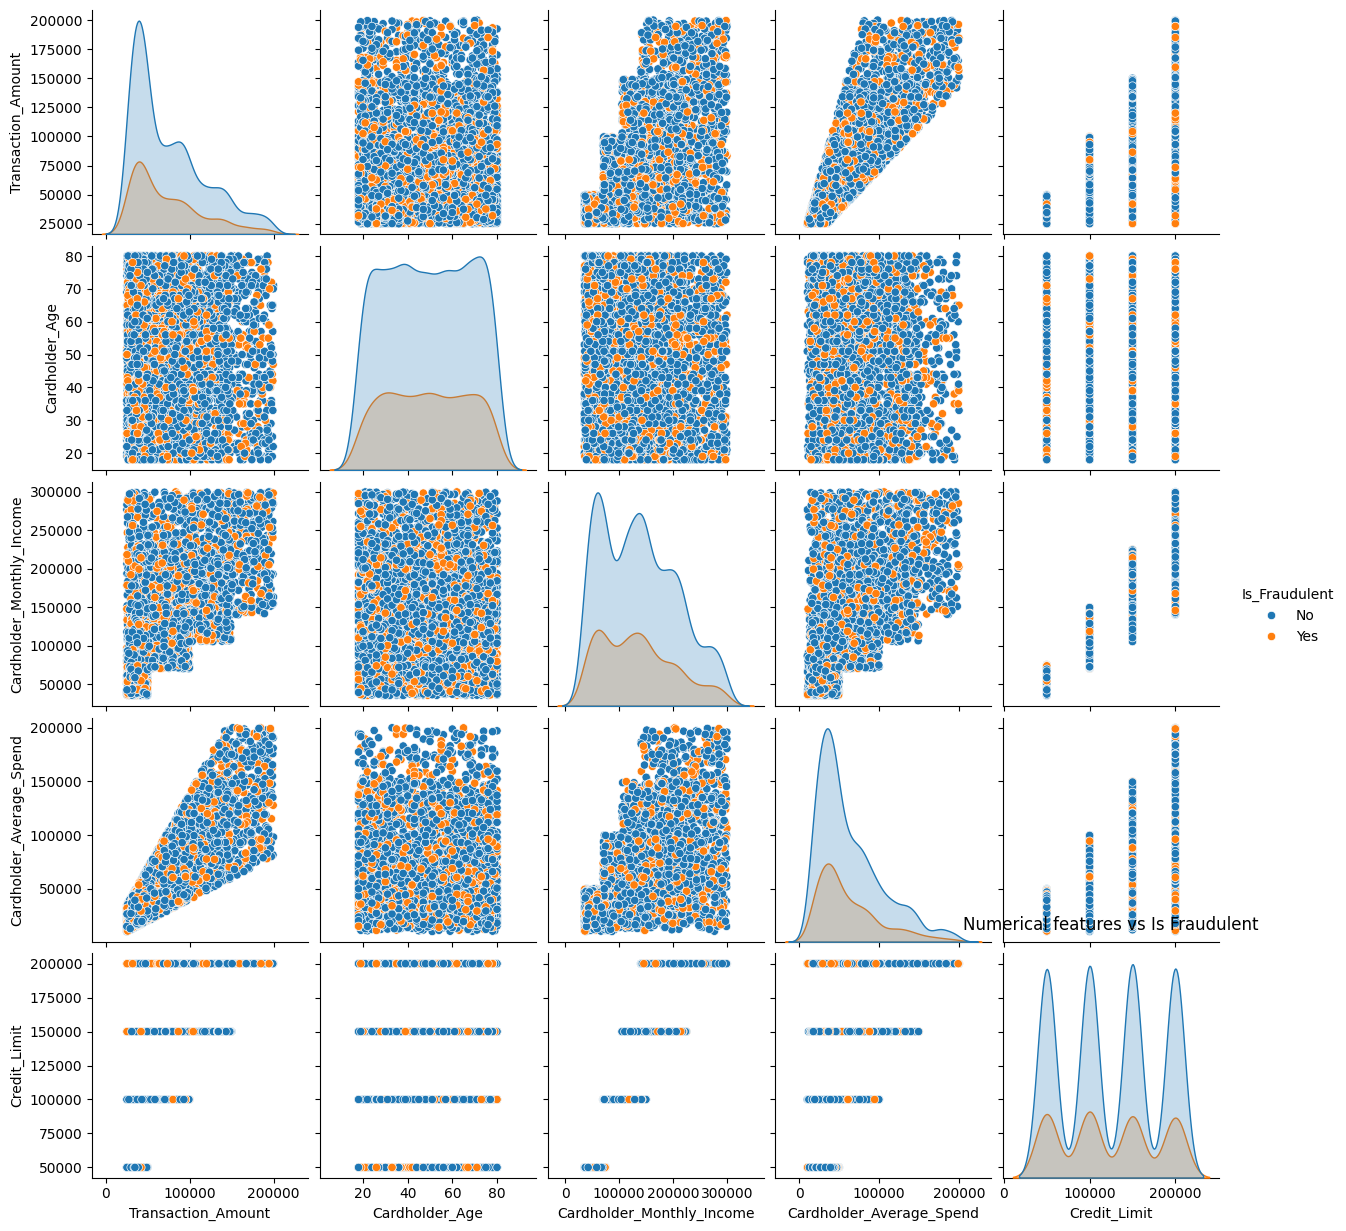

In [11]:
#using pair plot for better analysis
plt.figure(figsize=(6,6))
sns.pairplot(data=df,vars=numerical_cols,hue='Is_Fraudulent')
plt.title('Numerical features vs Is Fraudulent')
plt.show()

**d) Visualize the distribution of transaction amounts for fraudulent vs. non-fraudulent transactions using histograms or box plots.**

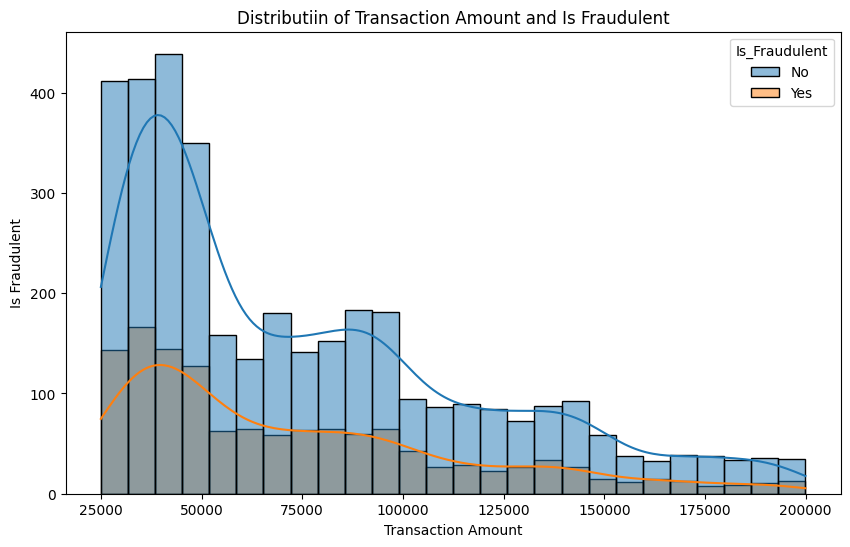

In [12]:
#using histogram for transaction amount and Is Fraudulent
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Transaction_Amount',hue='Is_Fraudulent',kde=True)
plt.title('Distributiin of Transaction Amount and Is Fraudulent')
plt.xlabel('Transaction Amount')
plt.ylabel('Is Fraudulent')
plt.show()

**e) Investigate whether certain features are more susceptible to fraud.**

we split the columns like numerical columns and categorical columns for the analysis

In [13]:
#using categorical columns for finding the fraud rate
categorical_cols=['Card_Type','Merchant_Category','Location','Region','Device_Type']
categorical_cols

['Card_Type', 'Merchant_Category', 'Location', 'Region', 'Device_Type']

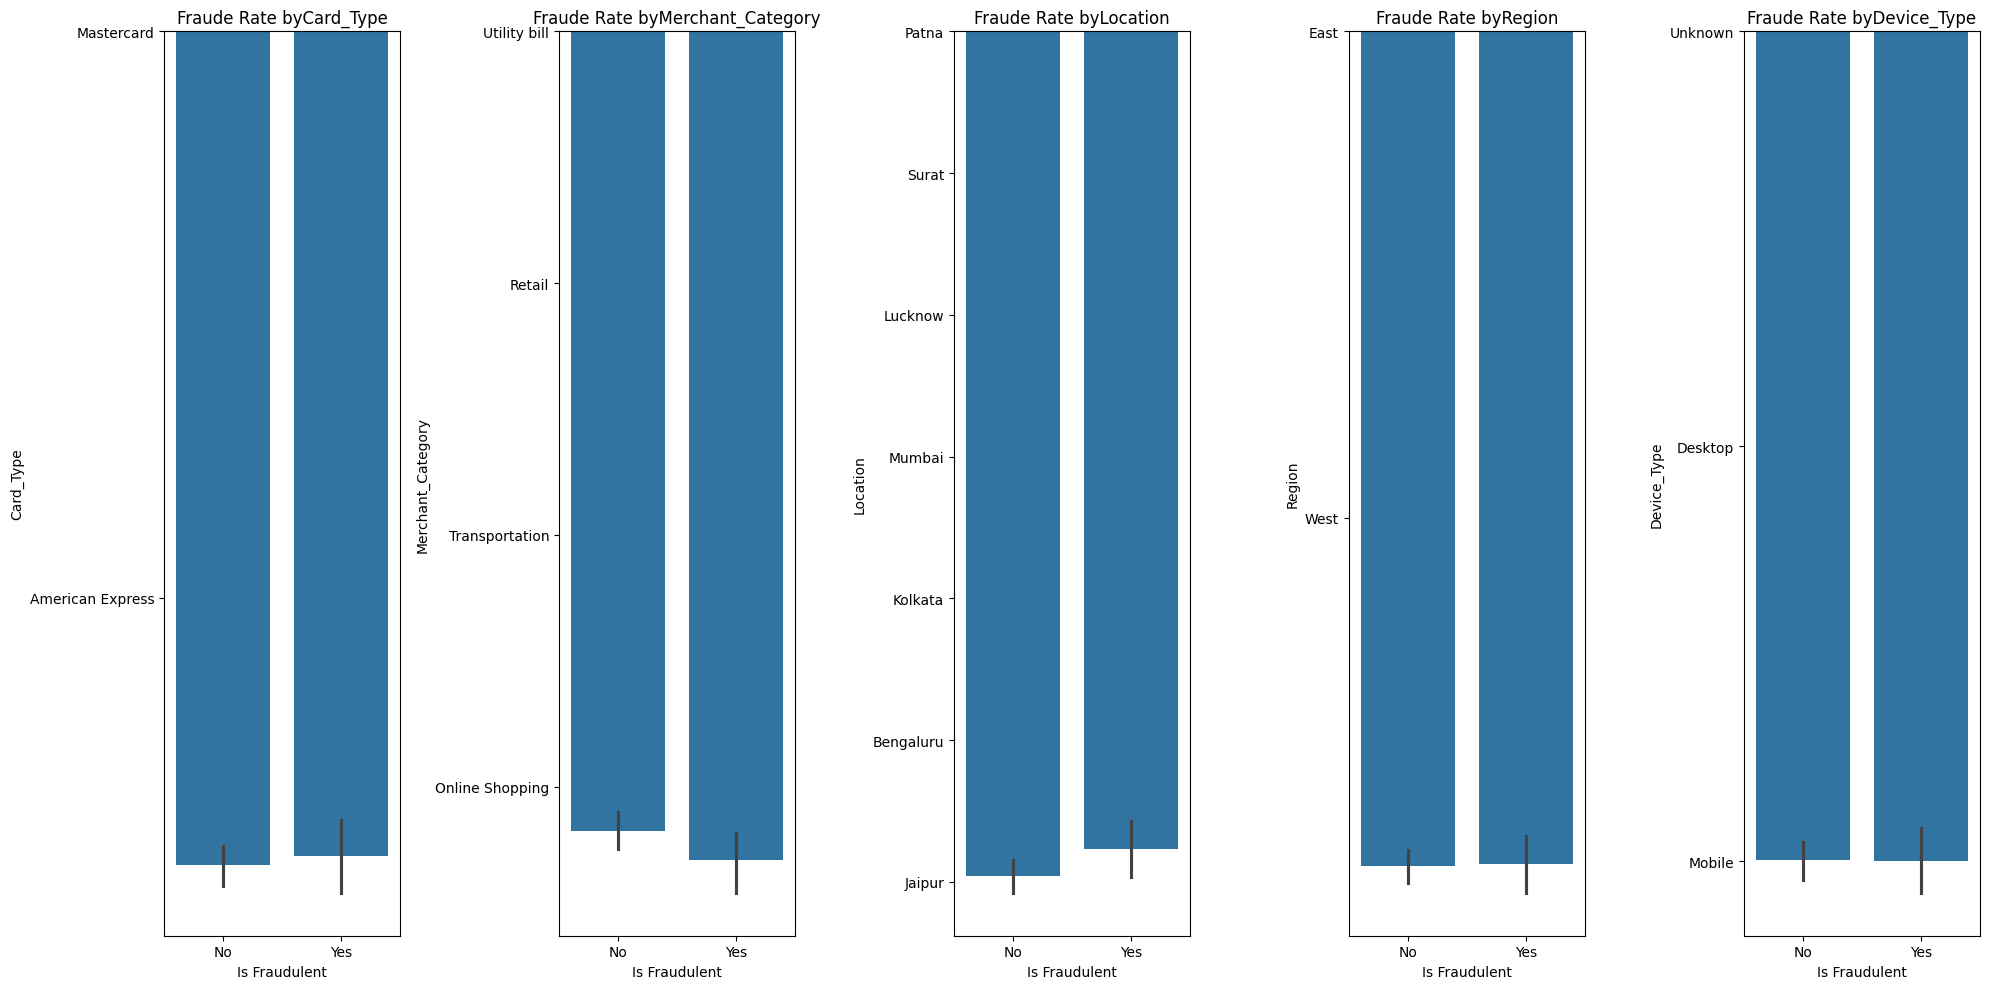

In [14]:
fig,axes=plt.subplots(ncols=5,figsize=(20,10))
for col,axis in zip(categorical_cols,axes.flatten()):
  sns.barplot(data=df,x='Is_Fraudulent',y=col,ax=axis)
  axis.set_title(f'Fraude Rate by{col}')
  axis.set_xlabel('Is Fraudulent')
  axis.set_ylabel(col)
plt.tight_layout()
plt.show()

**Explation:**

*   The above barplots shows the relationship between the categorical features vs fraud rate.
*   compare these features except region other features have high fraud
rate.



In [15]:
#using numerical columns for finding fraud rate
numerical_cols=['Transaction_Amount','Cardholder_Age','Cardholder_Monthly_Income','Cardholder_Average_Spend']
numerical_cols

['Transaction_Amount',
 'Cardholder_Age',
 'Cardholder_Monthly_Income',
 'Cardholder_Average_Spend']

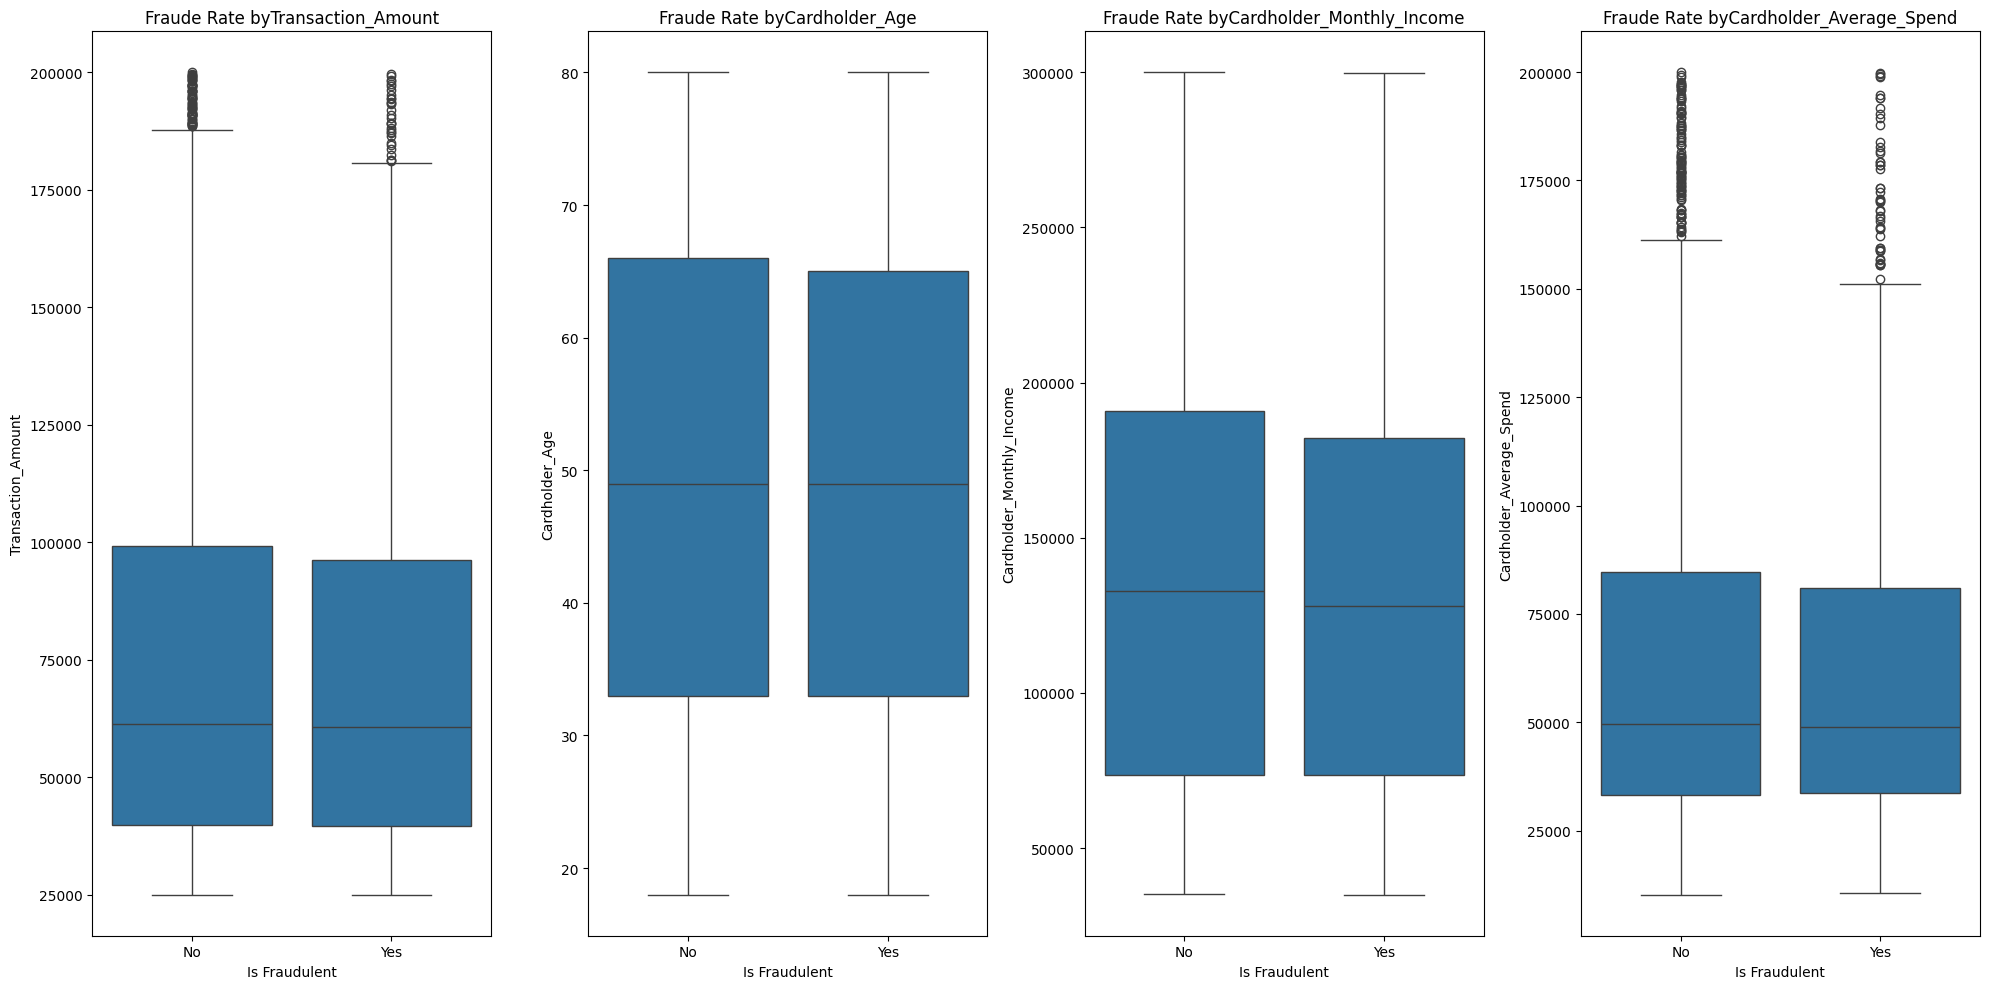

In [16]:
fig,axes=plt.subplots(ncols=4,figsize=(20,10))
for col,axis in zip(numerical_cols,axes.flatten()):
  sns.boxplot(data=df,x='Is_Fraudulent',y=col,ax=axis)
  axis.set_title(f'Fraude Rate by{col}')
  axis.set_xlabel('Is Fraudulent')
  axis.set_ylabel(col)
plt.tight_layout()
plt.show()

**Explanation:**

*  The above box plots shows the relationship between the numerical columns vs fraud rate.
*   The transaction amount column have high fraud rate compare with other features.



Finally the above visualization give susceptible fraud rate but we do all the visualization with raw data only so we have to clean and preprocess the dataset for further analysis.

**2) Data Preprocessing - Data Cleaning:**

**a) Handle missing values if any, using appropriate techniques such as KNNImputer; mean or median imputation for numerical features, and mode imputation for categorical features.**

In [17]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [18]:
#handling missing values with KNNImputer
from sklearn.impute import KNNImputer,SimpleImputer

In [19]:
numerical_cols=['Transaction_Amount','Cardholder_Monthly_Income','Cardholder_Average_Spend','Credit_Limit']
median_imputer=SimpleImputer(strategy='median')
df[numerical_cols]=median_imputer.fit_transform(df[numerical_cols])

In [20]:
categorical_cols=['Card_Type','Merchant_Category','Cardholder_Age','Cardholder_Gender','Device_Type']
mode_imputer=SimpleImputer(strategy='most_frequent')
df[categorical_cols]=mode_imputer.fit_transform(df[categorical_cols])

In [21]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,0
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,0
Cardholder_Gender,0
Cardholder_Monthly_Income,0


**b) Check for outliers in numerical features using statistical methods like Z-score or IQR (Interquartile Range) and remove them if necessary to ensure data quality.**

In [22]:
#select numerical features
numerical_cols=['Transaction_Amount','Cardholder_Age','Cardholder_Average_Spend','Credit_Limit']
numerical_cols

['Transaction_Amount',
 'Cardholder_Age',
 'Cardholder_Average_Spend',
 'Credit_Limit']

In [23]:
#check outliers in numerical columns using IQR
Q1=df[numerical_cols].quantile(0.25)
Q3=df[numerical_cols].quantile(0.75)

IQR=Q3 - Q1

lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR

df_removed_outliers=df[(df[numerical_cols]>=lower_bound)&(df[numerical_cols]<=upper_bound)]

print(f"Number of rows before removing outliers: {df.shape[0]}")
print(f"Number of rows after removing outliers: {df_removed_outliers.shape[0]}")

Number of rows before removing outliers: 5000
Number of rows after removing outliers: 5000


**c) Assess skewness in numerical features by calculating the skewness score. If any features are highly skewed, consider applying transformations such as square root or log transformation to improve their distribution before scaling, if needed.**

In [24]:
# finding skewness score for numerical features
skewness=df[numerical_cols].skew()
skewness

,0
Transaction_Amount,0.969995
Cardholder_Age,0.040108
Cardholder_Average_Spend,1.212733
Credit_Limit,0.012213


**Observation:**
 The cardholder Average spend column have highly skewed.So,we use log and square root transfor,ation for this colunm.

In [25]:
# log transformation
Cardholder_Average_spend_log=np.log(df['Cardholder_Average_Spend'])

# Square Root transformation
Cardholder_Average_spend_sqrt=np.sqrt(df['Cardholder_Average_Spend'])

In [26]:
# skewness score
Cardholder_Average_spend_log.skew()


np.float64(0.02259436211868222)

In [27]:
#skeweness score
Cardholder_Average_spend_sqrt.skew()

np.float64(0.6393995181056217)

We can see the both skewness score that the log transformation is better for this column

**3) Feature Engineering:**

**a) Identify the categorical features in the dataset.**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  5000 non-null   object 
 2   Merchant_Category          5000 non-null   object 
 3   Transaction_Amount         5000 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             5000 non-null   object 
 8   Cardholder_Gender          5000 non-null   object 
 9   Cardholder_Monthly_Income  5000 non-null   float64
 10  Cardholder_Average_Spend   5000 non-null   float64
 11  Credit_Limit               5000 non-null   float64
 12  Device_Type                5000 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [29]:
categorical_cols=df.select_dtypes(include='object').columns
categorical_cols

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Age',
       'Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

**b) Encode categorical features to numerical using techniques like one-hot encoding or label encoding techniques to prepare the data for machine learning algorithms.**

In [30]:
# before encoding we take a copy the dataset
df_encoded=df.copy()

In [31]:
#convert categorical cols into numerical cols using label encoding

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in categorical_cols:
  df_encoded[col]=label_encoder.fit_transform(df_encoded[col])

In [32]:
df_encoded.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4413,1,7,27214.0,0,10,0,5,0,94632.0,36369.65,100000.0,4,6,0
1,4138,0,5,83956.0,1,12,3,31,1,148118.0,89179.12,150000.0,1,0,0
2,3323,3,6,193280.0,2,10,0,8,1,210921.0,106668.60,200000.0,1,2,0
3,3775,2,4,167381.0,3,12,3,34,0,148070.0,173155.52,200000.0,1,2,1
4,1925,2,5,81170.0,4,8,1,19,0,174470.0,52713.09,200000.0,2,2,0


In [33]:
df=df_encoded

**4) Feature Selection:**

**a) Select relevant features that have the most impact on predicting fraudulent transactions.**

In [34]:
# select features using correlation matrix
correlation_matrix=df.corr()
correlation_matrix

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
Transaction_ID,1.000000,0.013285,-0.009008,0.020891,0.014737,0.020656,0.019082,0.001125,-0.000535,0.007787,0.027310,0.010951,-0.004166,0.009378,0.010376
Card_Type,0.013285,1.000000,-0.021039,0.014581,0.021348,-0.005191,-0.020697,-0.008790,-0.025105,0.010847,0.005312,0.010676,0.011610,0.022635,0.004290
Merchant_Category,-0.009008,-0.021039,1.000000,-0.007120,-0.018214,0.000382,0.003659,-0.016648,-0.002060,-0.005645,-0.005773,-0.006146,0.009959,0.014427,-0.013647
Transaction_Amount,0.020891,0.014581,-0.007120,1.000000,0.008311,-0.037754,0.000365,-0.013609,-0.011549,0.548811,0.810623,0.638482,0.028928,-0.006586,-0.019932
Transaction_DateTime,0.014737,0.021348,-0.018214,0.008311,1.000000,-0.018257,-0.021091,-0.007998,-0.007168,-0.002978,0.008459,0.011031,0.008610,-0.004194,-0.013907
Location,0.020656,-0.005191,0.000382,-0.037754,-0.018257,1.000000,0.030470,-0.002612,0.004826,-0.007018,-0.032346,-0.013639,0.015534,-0.000547,0.010019
Region,0.019082,-0.020697,0.003659,0.000365,-0.021091,0.030470,1.000000,0.010565,0.006935,0.023619,0.006682,0.012844,-0.014792,-0.003157,-0.037614
Cardholder_Age,0.001125,-0.008790,-0.016648,-0.013609,-0.007998,-0.002612,0.010565,1.000000,0.006105,-0.021567,0.001234,-0.010490,0.016456,0.006961,-0.004104
Cardholder_Gender,-0.000535,-0.025105,-0.002060,-0.011549,-0.007168,0.004826,0.006935,0.006105,1.000000,-0.009481,-0.001360,-0.021624,-0.013528,-0.011380,0.020621
Cardholder_Monthly_Income,0.007787,0.010847,-0.005645,0.548811,-0.002978,-0.007018,0.023619,-0.021567,-0.009481,1.000000,0.497383,0.859237,0.019311,-0.005793,-0.017802


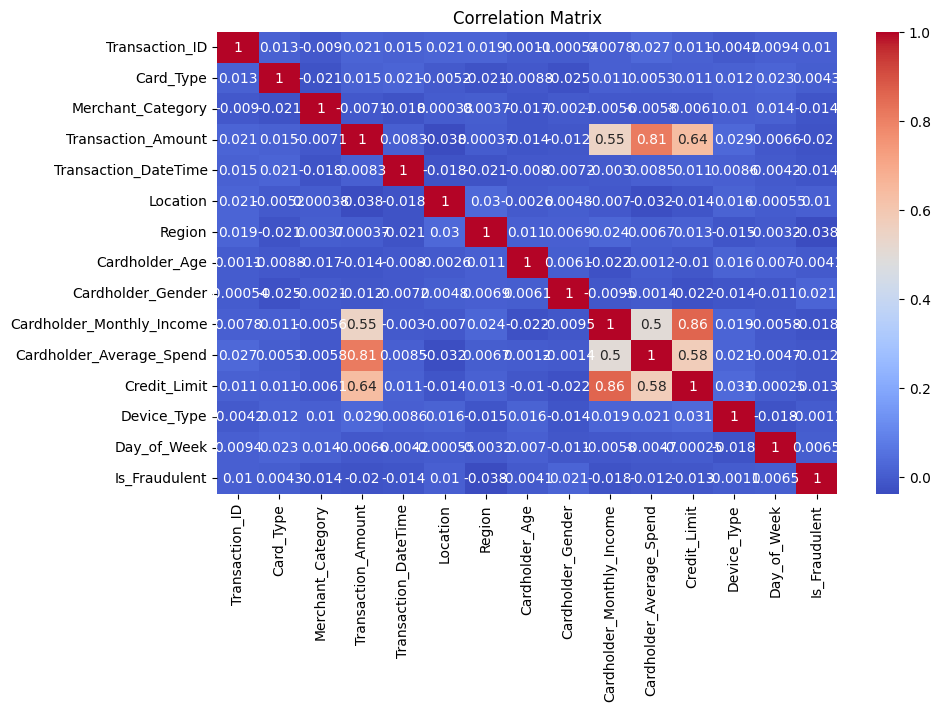

In [35]:
#using heatmap for better visualization
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**b) Identify and remove redundant or irrelevant features that do not contribute significantly to the prediction task.**

In [36]:
#x for features
#y for target

x=df.drop(['Transaction_DateTime','Region','Is_Fraudulent'],axis=1)
y=df['Is_Fraudulent']

**5) Split data into training and testing:**

**a) Divide the dataset into training and testing sets to evaluate the model's performance.**

In [37]:
#split the dataset into training and testing
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(f"Dataset Shape: {df.shape}")
print(f"x_train Shape: {x_train.shape}")
print(f"x_test Shape: {x_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")


Dataset Shape: (5000, 15)
x_train Shape: (4000, 12)
x_test Shape: (1000, 12)
y_train Shape: (4000,)
y_test Shape: (1000,)


**b) Ensure that both sets maintain the same distribution of fraudulent and non-fraudulent transactions to avoid data leakage.**

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

print(f"Over all distribution:\n{df['Is_Fraudulent'].value_counts(normalize=True)}")
print(f"y_train distribution:\n{y_train.value_counts(normalize=True)}")
print(f"y_test distribution:\n{y_test.value_counts(normalize=True)}")

Over all distribution:
Is_Fraudulent
0    0.7336
1    0.2664
Name: proportion, dtype: float64
y_train distribution:
Is_Fraudulent
0    0.7335
1    0.2665
Name: proportion, dtype: float64
y_test distribution:
Is_Fraudulent
0    0.734
1    0.266
Name: proportion, dtype: float64


**6) Feature Scaling:**

**a) Scale numerical features to ensure that they have the same magnitude, preventing some features from dominating others during model training.**

In [39]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_standard=scaler.fit_transform(x_train)
x_test_standard=scaler.transform(x_test)


In [40]:
#normalaization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_normalized=scaler.fit_transform(x_train)
x_test_normalized=scaler.transform(x_test)


**b)Common scaling techniques include Min-Max scaling or Standardization (Z-score normalization)**

In [41]:
#min max scaling
df_scaled=(df-df.min()) / (df.max()-df.min())
df_scaled.head()


,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,0.882777,0.333333,1.000000,0.012612,0.0000,0.833333,0.000000,0.080645,0.0,0.225091,0.137579,0.333333,1.00,1.000000,0.0
1,0.827766,0.000000,0.714286,0.337009,0.0002,1.000000,1.000000,0.500000,1.0,0.426999,0.416087,0.666667,0.25,0.000000,0.0
2,0.664733,1.000000,0.857143,0.962022,0.0004,0.833333,0.000000,0.129032,1.0,0.664080,0.508323,1.000000,0.25,0.333333,0.0
3,0.755151,0.666667,0.571429,0.813955,0.0006,1.000000,1.000000,0.548387,0.0,0.426818,0.858963,1.000000,0.25,0.333333,1.0
4,0.385077,0.666667,0.714286,0.321082,0.0008,0.666667,0.333333,0.306452,0.0,0.526478,0.223772,1.000000,0.50,0.333333,0.0


In [42]:
#Z-score normalization
df_scaled=(df-df.mean())/(df.std())
df_scaled.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,1.325579,-0.840322,1.579994,-1.101512,-1.731531,1.049098,-1.720662,-1.375153,-0.969175,-0.629947,-0.664674,-0.442404,1.378082,1.512440,-0.602551
1,1.135073,-1.790483,0.625718,0.216053,-1.730839,1.582555,1.165386,0.027910,1.031599,0.165174,0.678823,0.456425,-0.727360,-1.531312,-0.602551
2,0.570480,1.059999,1.102856,2.754587,-1.730146,1.049098,-1.720662,-1.213261,1.031599,1.098802,1.123763,1.355254,-0.727360,-0.516728,-0.602551
3,0.883604,0.109839,0.148581,2.153205,-1.729453,1.582555,1.165386,0.189802,-0.969175,0.164461,2.815220,1.355254,-0.727360,-0.516728,1.659278
4,-0.397985,0.109839,0.625718,0.151361,-1.728760,0.515640,-0.758646,-0.619658,-0.969175,0.556922,-0.248890,1.355254,-0.025546,-0.516728,-0.602551


**7) Build the Machine Learning Model:**

**a) Import the necessary modules and libraries for building and evaluating machine learning models.**

In [43]:
# import model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score

**b) Define a list or dictionary of classifiers to be evaluated; including Logistic Regression, Naive Bayes, Decision Tree, Random Forest, K-Nearest Neighbors, and SVM. Then, compute the accuracy score and F1-score for each classifier.**

In [69]:
#Dictionary for classifers
classifiers={'Logistic Regression' : LogisticRegression(),
              'Naive Bayes':GaussianNB(),
             'Decision Tree':DecisionTreeClassifier(),
             'Random Forest':RandomForestClassifier(),
             'K-Nearest Neighbors':KNeighborsClassifier(),
             'Support Vector Machine':SVC()}

#find accuracy score and f1 score
#initalize the empty dic to score the results
results={}

#iterate through classifier

for name,clf in classifiers.items():
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)
  results[name]={'Accuracy Score':accuracy,'f1_score':f1}


#covert the results dic to a dataframe
results_df=pd.DataFrame(results).T
results_df

,Accuracy Score,f1_score
Logistic Regression,0.734,0.000000
Naive Bayes,0.734,0.000000
Decision Tree,0.598,0.271739
Random Forest,0.728,0.007299
K-Nearest Neighbors,0.673,0.150649
Support Vector Machine,0.734,0.000000


**c) Select a machine learning algorithm for binary classification with the highest accuracy or F1-score from the above step.**

In [50]:
#select best model with highest f1 score
best_model = results_df['f1_score'].idxmax()
print(f"Best Model:{best_model}")

Best Model:Decision Tree


Based on highest F1 score "Decision Tree" is the best model

In [60]:
#select best model with highest accuracy score
best_model = results_df['Accuracy Score'].idxmax()
print(f"Best Model:{best_model}")

Best Model:Logistic Regression


Based on highest Accuracy Score "Logistic Regression" is the best model.

**d) Train the selected model using the training dataset and evaluate its performance using appropriate metrics like confusion matrix, accuracy, precision, recall, and F1-score.**

In [63]:
#take decision tree model based on f1 score
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [64]:
#evaluate metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

confusion_mat=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print(f"Confusion matrix:\n{confusion_mat}")
print(f"Accuracy score:\n{accuracy}")
print(f"Precision Score:\n{precision}")
print(f"Recall Score:\n{recall}")
print(f"F1 Score:\n{f1}")


Confusion matrix:
[[514 220]
 [190  76]]
Accuracy score:
0.59
Precision Score:
0.25675675675675674
Recall Score:
0.2857142857142857
F1 Score:
0.2704626334519573


**e) Validate the model's performance on the testing dataset and interpret the results to assess its effectiveness in detecting fraudulent transactions.**

In [66]:
# validate the models performance on the testing dataset
from sklearn.metrics import classification_report

y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.73      0.70      0.71       734
           1       0.26      0.29      0.27       266

    accuracy                           0.59      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.60      0.59      0.60      1000



**observation:**


*  class 0 - Non-Fraudulent
*  class 1 - Fraudulent

*   Test set size = 1000 samples
   





**Non-Fraudulent:**

*   **Precision :**The model predicted as non-fraud 73% were correct.
*   **Recall :** It identified 70% of actual non fraud transactions.

*   **F1 Score :**It gives good balance between precision and recall for non fraud.





**Fraudulent:**

*   **Precision :** It predicts only 26% were correct.
*   **Recall :** It predicts 29% were correct.

*   **F1 Score :**Quit low.





Over all accuracy says 59% correctly.

Finally the model performance better class 0,doing other model may be it gives much more prediction.